# 20160044 Shin Dong-Ha Assignment08
# Github Link : https://github.com/sinwindis/Assignment08

Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

provided code

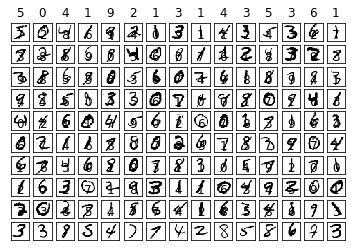

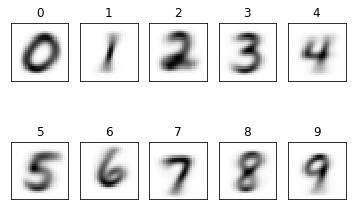

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

FUCNTION DEFINITION: sign(x)

In [3]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

DEFINE FUNCTION: makeXhat


Generated Matrix
$$AX = B$$
$$A = [x_1, x_2, \dots, x_{784}]$$
$$X = [\theta_1, \theta_2, \dots, \theta_{784}]$$
$$B = isZero$$
$$\hat{X} = A^T(AA^T)^{-1}B$$

Returned Value
$$\hat{X}$$

In [4]:
def makeXhat():

    A = np.empty((num_test, size_row*size_col), dtype=float)
    Xhat = np.empty((size_row*size_col), dtype=float)
    B = np.empty((num_test), dtype=float)
    
    

    
    for i in range(num_test):
        for j in range(size_row*size_col):
            A[i][j] = list_image_test[j][i]
        
        
    for i in range(num_test):
        if list_label_test[i] == 0:
            B[i] == 1
        else:
            B[i] == -1

    #Xhat = np.matmul(np.matmul(inv(np.matmul(np.transpose(A), A)), np.transpose(A)), B)
    
    Xhat = np.matmul(np.matmul(np.transpose(A), inv(np.matmul(A, np.transpose(A)))), B)
    
    return Xhat

DEFINE FUNCTION: classifier
$$classifier(\hat{X}, imageMatrix)$$
$$return: \hat{X}_1imageMatrix_1 + \hat{X}_2imageMatrix_2 + \dots + \hat{X}_{784}imageMatrix_{784}$$

In [5]:
def classifier(standard, testee):
    res = standard*testee
    resSum = 0
    for i in list(res):
        resSum += i
    return resSum

making theta matrix

In [21]:
thetaMatrix = makeXhat()

Distributing images using theta matrix

In [48]:
#result = [0=TP 1=FP 2=TN 3=FN]
result = np.empty((num_test))
#average image = [image, 0=TP 1=FP 2=TN 3=FN]
averageImage = np.zeros((size_row*size_col, 4))
#resultCount = [0=TP 1=FP 2=TN 3=FN]
resultCount = np.zeros((4), dtype=int)

for i in range(num_test):
    classresult = sign(classifier(thetaMatrix, list_image_test[:, i]))
    if classresult == 1:
        if list_label_test[i] == 0:
            result[i] = 0
            averageImage[:, 0] += list_image_test[:, i]
            resultCount[0] += 1
        else:
            result[i] = 1
            averageImage[:, 1] += list_image_test[:, i]
            resultCount[1] += 1
    else:
        if list_label_test[i] == 0:
            result[i] = 2
            averageImage[:, 2] += list_image_test[:, i]
            resultCount[2] += 1
        else:
            result[i] = 3
            averageImage[:, 3] += list_image_test[:, i]
            resultCount[3] += 1

Plotting average images

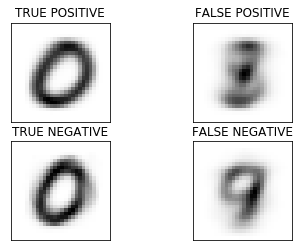

result count:
TP: 808  FP: 5117  TN: 172  FN: 3903
Accuracy: 0.4711


In [58]:
for i in range(4):
    averageImage[i] /= resultCount[i]
    plt.subplot(2, 2, i+1)
    if i == 0:
        plt.title("TRUE POSITIVE")
    elif i == 1:
        plt.title("FALSE POSITIVE")
    elif i == 2:
        plt.title("TRUE NEGATIVE")
    elif i == 3:
        plt.title("FALSE NEGATIVE")
    
    plt.imshow(averageImage[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

print("result count:")
print("TP:", resultCount[0], " FP:", resultCount[1], " TN:", resultCount[2], " FN:", resultCount[3])
accuracy = (resultCount[0]+resultCount[3])/num_test
print("Accuracy:", accuracy)